In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pickle
import scipy
from scipy import stats

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 18
plt.rc('text', usetex=False)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')
plt.tight_layout()

# plt.rc('font', family='Arial', size=12)
# plt.rc('axes', titlesize=16, labelsize=14, grid=True)
plt.rc('lines', linewidth=2)
plt.rc('legend', fontsize=18, frameon=False)
plt.rc('xtick', labelsize=14, direction='in')
plt.rc('ytick', labelsize=14, direction='in')
plt.rc('figure', figsize=(6, 4), dpi=100)

cmap = cm.get_cmap('tab10')
color_dict = {'CBQ': 'red', 'LSMC': 'blue', 'IS': 'darkgreen', 'KMS': cmap(1)}
alpha = 0.1

<Figure size 600x400 with 0 Axes>

In [35]:
import shutil
import os

working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/finance/'
os.chdir(working_dir)
dirs = []
for d in os.listdir():
    if '__complete' in d:
        dirs.append(d)
    else:
        try:
            shutil.rmtree(d)
        except:
            pass
        
print(dirs)

working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/finance_stein/'
os.chdir(working_dir)
dirs_stein = []
for d in os.listdir():
    if '__complete' in d:
        dirs_stein.append(d)
    else:
        try:
            shutil.rmtree(d)
        except:
            pass
        
        
print(dirs_stein)

['seed_5__complete', 'seed_8__complete', 'seed_3__complete', 'seed_4__complete', 'seed_9__complete', 'seed_2__complete', 'seed_7__complete', 'seed_1__complete', 'seed_6__complete', 'seed_10__complete']
['seed_5__complete', 'seed_8__complete', 'seed_3__complete', 'seed_4__complete', 'seed_9__complete', 'seed_2__complete', 'seed_7__complete', 'seed_1__complete', 'seed_6__complete', 'seed_10__complete']


In [36]:
def robust_mean_se(arr):
#     arr = np.log(arr)
#     min_index = np.argmin(arr)
#     max_index = np.argmax(arr)

#     # Delete the minimum and maximum elements
#     arr = np.delete(arr, min_index)
#     arr = np.delete(arr, max_index - 1 if max_index > min_index else max_index)
    
#     # print(arr)
    
#     m = np.median(arr)
#     se = scipy.stats.sem(arr)
    
#     confidence_level = 0.95
#     degrees_of_freedom = len(arr) - 1
#     lower, upper = stats.t.interval(confidence_level, degrees_of_freedom, m, se)
        # return np.exp(m), np.exp(lower), np.exp(2 * m - lower)
    arr = np.sort(arr)
    length = len(arr)
    
    median = arr[int(length / 2)]
    lower = arr[2]
    upper = arr[-2]
    return median, lower, upper

In [37]:
working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/'
os.chdir(working_dir)

dir_num = len(dirs)
dir_stein_num = len(dirs_stein)

# Nx_array = [5, 10]
Nx_array = [5, 10, 20, 30]
# Ny_array = [3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# Ny_array = [10, 30, 50]
Ny_array = np.arange(5, 105, 5)

MSE_dict = {}


for Nx in Nx_array:
    MSE_dict_temp = {}
        
    MSE_dict_temp['BMC stein mean'] = np.zeros(len(Ny_array))
    MSE_dict_temp['BMC stein lower'] = np.zeros(len(Ny_array))
    MSE_dict_temp['BMC stein upper'] = np.zeros(len(Ny_array))

    MSE_dict_temp['BMC mean'] = np.zeros(len(Ny_array))
    MSE_dict_temp['BMC lower'] = np.zeros(len(Ny_array))
    MSE_dict_temp['BMC upper'] = np.zeros(len(Ny_array))

    MSE_dict_temp['LSMC mean'] = np.zeros(len(Ny_array))
    MSE_dict_temp['LSMC lower'] = np.zeros(len(Ny_array))
    MSE_dict_temp['LSMC upper'] = np.zeros(len(Ny_array))

    MSE_dict_temp['IS mean'] = np.zeros(len(Ny_array))
    MSE_dict_temp['IS lower'] = np.zeros(len(Ny_array))
    MSE_dict_temp['IS upper'] = np.zeros(len(Ny_array))

    MSE_dict_temp['KMS mean'] = np.zeros(len(Ny_array))
    MSE_dict_temp['KMS lower'] = np.zeros(len(Ny_array))
    MSE_dict_temp['KMS upper'] = np.zeros(len(Ny_array))

    for i, Ny in enumerate(Ny_array):
        mse_BMC_stein = np.zeros(dir_stein_num)
        mse_BMC = np.zeros(dir_num)
        mse_LSMC = np.zeros(dir_num)
        mse_IS = np.zeros(dir_num)
        mse_KMS = np.zeros(dir_num)
        
        for l, d in enumerate(dirs_stein):
            with open(f'./finance_stein/{d}/mse_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            mse_BMC_stein[l] = dict_all['BMC']
            
        for l, d in enumerate(dirs):
            with open(f'./finance/{d}/mse_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            mse_BMC[l] = dict_all['BMC']
            mse_LSMC[l] = dict_all['LSMC']
            mse_IS[l] = dict_all['IS']
            mse_KMS[l] = dict_all['KMS']
        
        MSE_dict_temp['BMC stein mean'][i], MSE_dict_temp['BMC stein lower'][i], MSE_dict_temp['BMC stein upper'][i] = robust_mean_se(mse_BMC_stein)
        MSE_dict_temp['BMC mean'][i], MSE_dict_temp['BMC lower'][i], MSE_dict_temp['BMC upper'][i] = robust_mean_se(mse_BMC)
        MSE_dict_temp['LSMC mean'][i], MSE_dict_temp['LSMC lower'][i], MSE_dict_temp['LSMC upper'][i] = robust_mean_se(mse_LSMC)
        MSE_dict_temp['IS mean'][i], MSE_dict_temp['IS lower'][i], MSE_dict_temp['IS upper'][i] = robust_mean_se(mse_IS)
        MSE_dict_temp['KMS mean'][i], MSE_dict_temp['KMS lower'][i], MSE_dict_temp['KMS upper'][i] = robust_mean_se(mse_KMS)

    MSE_dict[f"{Nx}"] = MSE_dict_temp
    


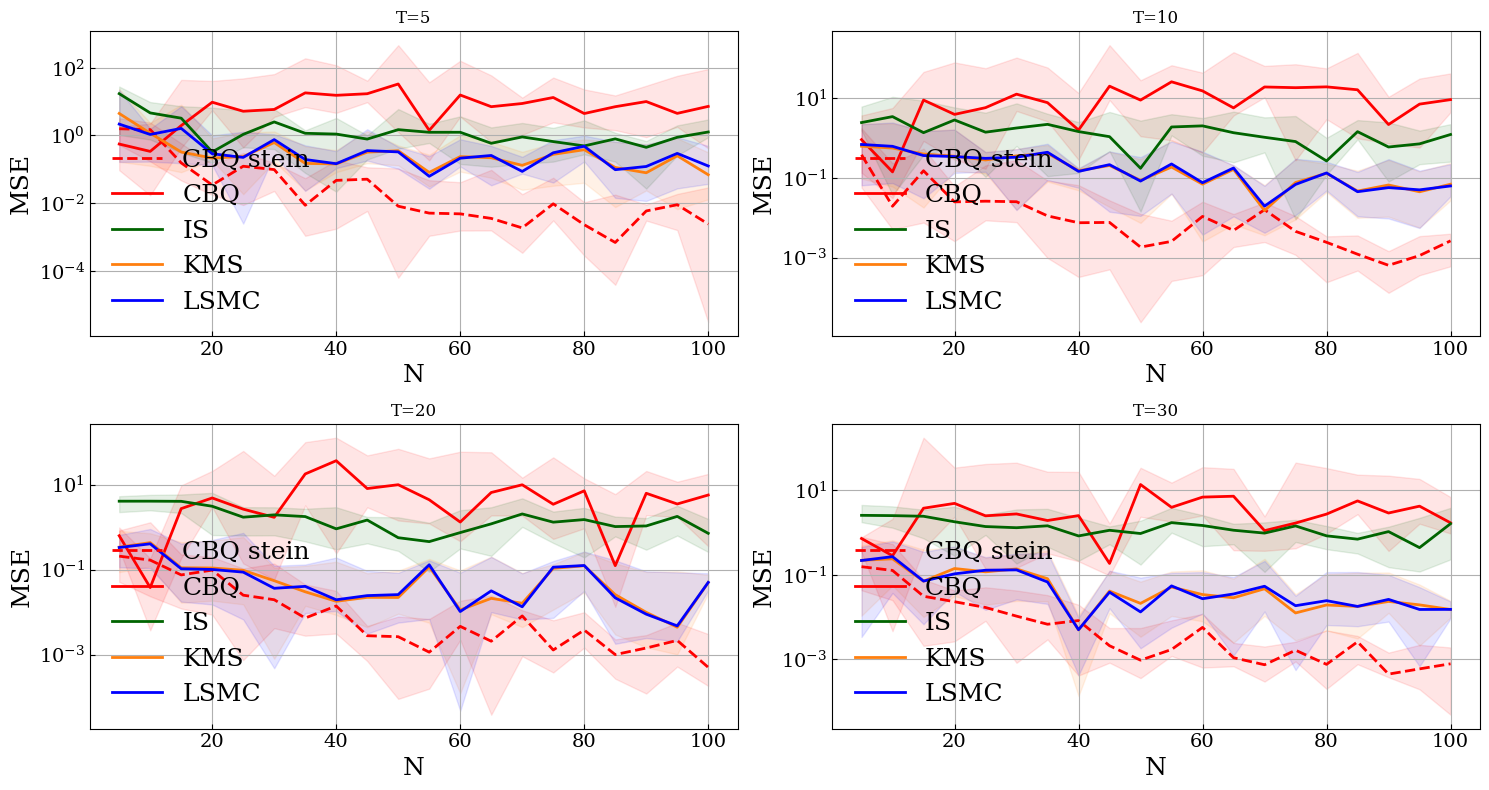

In [41]:
fig, axs = plt.subplots(int(len(Nx_array) / 2), 2, figsize=(15, len(Nx_array) * 2))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, MSE_dict[f"{Nx}"]['BMC stein mean'], color=color_dict['CBQ'], label=f'CBQ stein', linestyle='--')
    axs[i].fill_between(Ny_array, MSE_dict[f"{Nx}"]['BMC stein lower'], 
                        MSE_dict[f"{Nx}"]['BMC stein upper'],
                        color=color_dict['CBQ'], alpha=alpha)
    
    axs[i].plot(Ny_array, MSE_dict[f"{Nx}"]['BMC mean'], color=color_dict['CBQ'], label=f'CBQ')
    axs[i].fill_between(Ny_array, MSE_dict[f"{Nx}"]['BMC lower'], 
                        MSE_dict[f"{Nx}"]['BMC upper'],
                        color=color_dict['CBQ'], alpha=alpha)
    
    axs[i].plot(Ny_array, MSE_dict[f"{Nx}"]['IS mean'], color=color_dict['IS'], label=f'IS')
    axs[i].fill_between(Ny_array, MSE_dict[f"{Nx}"]['IS lower'], 
                        MSE_dict[f"{Nx}"]['IS upper'],
                        color=color_dict['IS'], alpha=alpha)
    
    axs[i].plot(Ny_array, MSE_dict[f"{Nx}"]['KMS mean'], color=color_dict['KMS'], label=f'KMS')
    axs[i].fill_between(Ny_array, MSE_dict[f"{Nx}"]['KMS lower'], 
                        MSE_dict[f"{Nx}"]['KMS upper'],
                        color=color_dict['KMS'], alpha=alpha)
    
    axs[i].plot(Ny_array, MSE_dict[f"{Nx}"]['LSMC mean'], color=color_dict['LSMC'], label=f'LSMC')
    axs[i].fill_between(Ny_array, MSE_dict[f"{Nx}"]['LSMC lower'], 
                        MSE_dict[f"{Nx}"]['LSMC upper'],
                        color=color_dict['LSMC'], alpha=alpha)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('MSE')
    axs[i].set_xlabel('N')
    axs[i].set_title(f'T={Nx}')
plt.tight_layout()
plt.show()

In [39]:
working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/'
os.chdir(working_dir)

dir_num = len(dirs)
dir_stein_num = len(dirs_stein)

# Nx_array = [5, 10]
Nx_array = [5, 10, 20, 30]
# Ny_array = [3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# Ny_array = [10, 30, 50]
Ny_array = np.arange(5, 105, 5)

Time_dict = {}


for Nx in Nx_array:
    Time_dict_temp = {}
        
    Time_dict_temp['BMC stein mean'] = np.zeros(len(Ny_array))
    Time_dict_temp['BMC stein lower'] = np.zeros(len(Ny_array))
    Time_dict_temp['BMC stein upper'] = np.zeros(len(Ny_array))

    Time_dict_temp['BMC mean'] = np.zeros(len(Ny_array))
    Time_dict_temp['BMC lower'] = np.zeros(len(Ny_array))
    Time_dict_temp['BMC upper'] = np.zeros(len(Ny_array))

    Time_dict_temp['LSMC mean'] = np.zeros(len(Ny_array))
    Time_dict_temp['LSMC lower'] = np.zeros(len(Ny_array))
    Time_dict_temp['LSMC upper'] = np.zeros(len(Ny_array))

    Time_dict_temp['IS mean'] = np.zeros(len(Ny_array))
    Time_dict_temp['IS lower'] = np.zeros(len(Ny_array))
    Time_dict_temp['IS upper'] = np.zeros(len(Ny_array))

    Time_dict_temp['KMS mean'] = np.zeros(len(Ny_array))
    Time_dict_temp['KMS lower'] = np.zeros(len(Ny_array))
    Time_dict_temp['KMS upper'] = np.zeros(len(Ny_array))

    for i, Ny in enumerate(Ny_array):
        time_BMC_stein = np.zeros(dir_stein_num)
        time_BMC = np.zeros(dir_num)
        time_LSMC = np.zeros(dir_num)
        time_IS = np.zeros(dir_num)
        time_KMS = np.zeros(dir_num)
        
        for l, d in enumerate(dirs_stein):
            with open(f'./finance_stein/{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            time_BMC_stein[l] = dict_all['BMC']
            
        for l, d in enumerate(dirs):
            with open(f'./finance/{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            time_BMC[l] = dict_all['BMC']
            time_LSMC[l] = dict_all['LSMC']
            time_IS[l] = dict_all['IS']
            time_KMS[l] = dict_all['KMS']
        
        Time_dict_temp['BMC stein mean'][i], Time_dict_temp['BMC stein lower'][i], Time_dict_temp['BMC stein upper'][i] = robust_mean_se(time_BMC_stein)
        Time_dict_temp['BMC mean'][i], Time_dict_temp['BMC lower'][i], Time_dict_temp['BMC upper'][i] = robust_mean_se(time_BMC)
        Time_dict_temp['LSMC mean'][i], Time_dict_temp['LSMC lower'][i], Time_dict_temp['LSMC upper'][i] = robust_mean_se(time_LSMC)
        Time_dict_temp['IS mean'][i], Time_dict_temp['IS lower'][i], Time_dict_temp['IS upper'][i] = robust_mean_se(time_IS)
        Time_dict_temp['KMS mean'][i], Time_dict_temp['KMS lower'][i], Time_dict_temp['KMS upper'][i] = robust_mean_se(time_KMS)

    Time_dict[f"{Nx}"] = Time_dict_temp
    


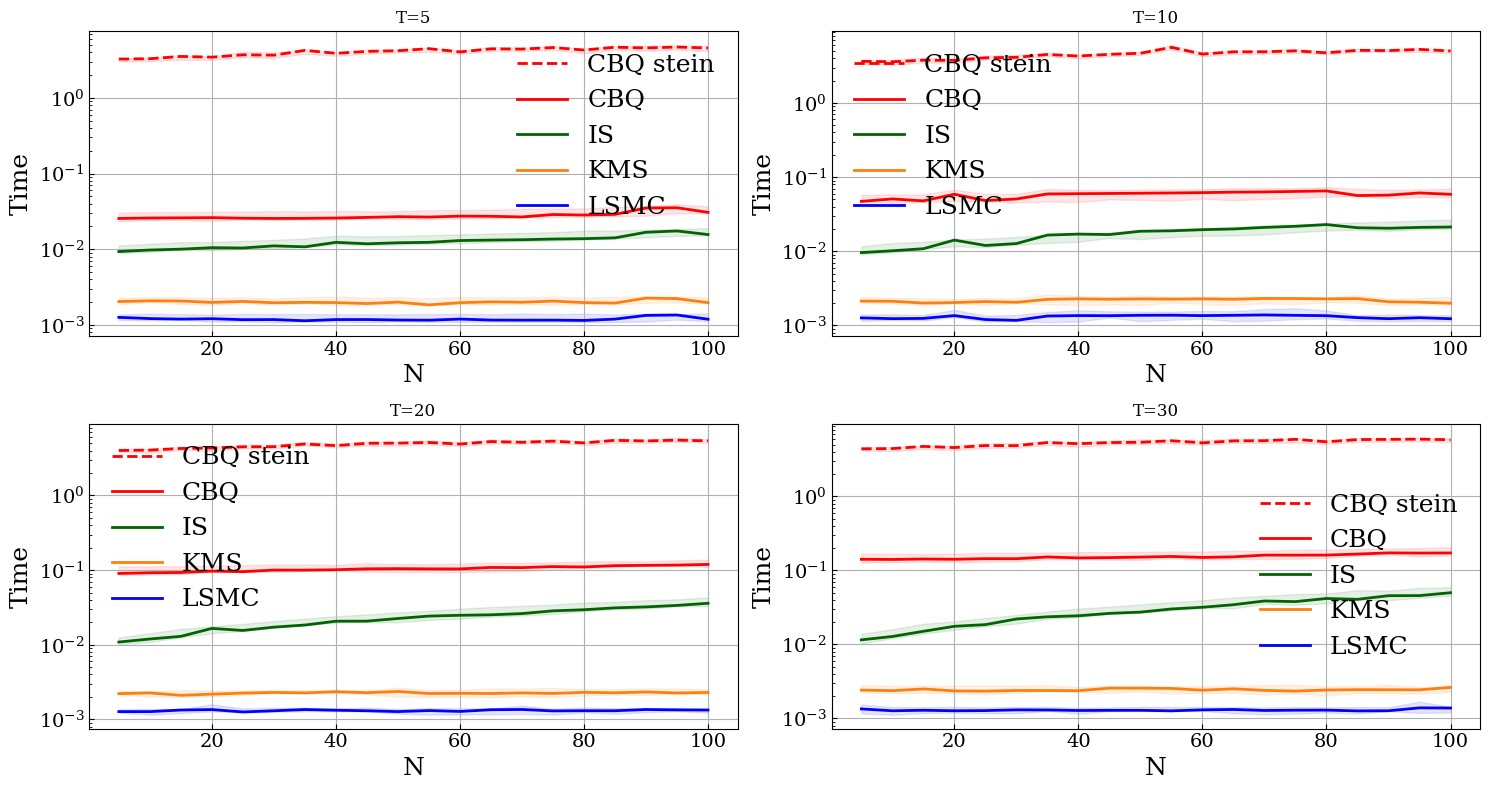

In [42]:
fig, axs = plt.subplots(int(len(Nx_array) / 2), 2, figsize=(15, len(Nx_array) * 2))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['BMC stein mean'], color=color_dict['CBQ'], label=f'CBQ stein', linestyle='--')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['BMC stein lower'], 
                        Time_dict[f"{Nx}"]['BMC stein upper'],
                        color=color_dict['CBQ'], alpha=alpha)
    
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['BMC mean'], color=color_dict['CBQ'], label=f'CBQ')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['BMC lower'], 
                        Time_dict[f"{Nx}"]['BMC upper'],
                        color=color_dict['CBQ'], alpha=alpha)
    
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['IS mean'], color=color_dict['IS'], label=f'IS')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['IS lower'], 
                        Time_dict[f"{Nx}"]['IS upper'],
                        color=color_dict['IS'], alpha=alpha)
    
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['KMS mean'], color=color_dict['KMS'], label=f'KMS')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['KMS lower'], 
                        Time_dict[f"{Nx}"]['KMS upper'],
                        color=color_dict['KMS'], alpha=alpha)
    
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['LSMC mean'], color=color_dict['LSMC'], label=f'LSMC')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['LSMC lower'], 
                        Time_dict[f"{Nx}"]['LSMC upper'],
                        color=color_dict['LSMC'], alpha=alpha)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('Time')
    axs[i].set_xlabel('N')
    axs[i].set_title(f'T={Nx}')
plt.tight_layout()
plt.show()

In [43]:
large_Nx_array = [1000]
large_Ny_array = [1000]

for Nx in large_Nx_array:
    for Ny in large_Ny_array:
        time_KMS_large = np.zeros(dir_num)
        time_LSMC_large = np.zeros(dir_num)
        time_IS_large = np.zeros(dir_num)
        
        mse_KMS_large = np.zeros(dir_num)
        mse_LSMC_large = np.zeros(dir_num)
        mse_IS_large = np.zeros(dir_num)
        
        for l, d in enumerate(dirs):
            with open(f"./finance/{d}/time_dict_X_{Nx}_y_{Ny}", 'rb') as f:
                dummy_dict = pickle.load(f)
                time_KMS_large[l] = dummy_dict['KMS']
                time_LSMC_large[l] = dummy_dict['LSMC']
                time_IS_large[l] = dummy_dict['IS']
                
            with open(f"./finance/{d}/mse_dict_X_{Nx}_y_{Ny}", 'rb') as f:
                dummy_dict = pickle.load(f)
                mse_KMS_large[l] = dummy_dict['KMS']
                mse_LSMC_large[l] = dummy_dict['LSMC']
                mse_IS_large[l] = dummy_dict['IS']

                
print('===== MSE =====')
print(f'KMS with large samples has MSE {mse_KMS_large.mean()}')
print(f'LSMC with large samples has MSE {mse_LSMC_large.mean()}')
print(f'IS with large samples has MSE {mse_IS_large.mean()}')

print('===== Time =====')
print(f'KMS with large samples has Time {time_KMS_large.mean()}')
print(f'LSMC with large samples has Time {time_LSMC_large.mean()}')
print(f'IS with large samples has Time {time_IS_large.mean()}')


===== MSE =====
KMS with large samples has MSE 0.01039602516989881
LSMC with large samples has MSE 0.0051373169131238685
IS with large samples has MSE 1.6822953343391418
===== Time =====
KMS with large samples has Time 0.9031491994857788
LSMC with large samples has Time 0.09954700469970704
IS with large samples has Time 15.499931359291077
